# Predicting Housing Prices

The [dataset]('https://www.kaggle.com/anthonypino/melbourne-housing-market') below is a record of housing clearance data from Melbourne in 2016. The purpose of this exercise is to predict the continuous target variable of house price given the other features.

## Loading Data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR

from sklearn.feature_selection import SelectKBest, chi2

from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('Melbourne_housing_FULL.csv')

## Preliminary Analysis

In [3]:
df.shape

(34857, 21)

In [4]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [5]:
def snapshot(data):
    '''Creates a DataFrame that gives snapshot of original dataset for preliminary cleaning and analysis.'''
    preliminary_details = pd.DataFrame()
    preliminary_details['Type'] = data.dtypes
    preliminary_details['Unique'] = data.nunique()
    preliminary_details['NaN'] = data.isnull().sum()
    preliminary_details['Sample'] = data.sample().T
    return preliminary_details

In [6]:
snapshot(df)

,Type,Unique,NaN,Sample
Suburb,object,351,0,Viewbank
Address,object,34009,0,7 Kuranga Rd
Rooms,int64,12,0,3
Type,object,3,0,h
Price,float64,2871,7610,950000
Method,object,9,0,S
SellerG,object,388,0,Nelson
Date,object,78,0,4/11/2017
Distance,float64,215,1,8.9
Postcode,float64,211,1,3084


In [7]:
# Since our variable of interest is Price, we will be dropping all NaN entries
df = df[~df.Price.isnull()]

# With considerable overlap between the NaN values in Bedroom2, Bathroom, etc. we will remove these rows instead of filling
# them with means/medians/common value in order to avoid skewing the results (since they account for almost 25% of the data)
df = df[~df.Bathroom.isnull()]
snapshot(df)

,Type,Unique,NaN,Sample
Suburb,object,338,0,Highett
Address,object,20424,0,10 Haynes St
Rooms,int64,11,0,4
Type,object,3,0,h
Price,float64,2607,0,1.535e+06
Method,object,5,0,S
SellerG,object,323,0,Thomson
Date,object,78,0,22/07/2017
Distance,float64,211,0,16
Postcode,float64,208,0,3190


In [8]:
# Filling missing values
df['Car'] = df['Car'].fillna(df.Car.mean())
df['Landsize'] = df['Landsize'].fillna(df.Landsize.mean())
df['BuildingArea'] = df['BuildingArea'].fillna(df.BuildingArea.mean())
df['YearBuilt'] = df['YearBuilt'].fillna(df.YearBuilt.mean())
df['Lattitude'] = df['Lattitude'].fillna(df.Lattitude.mean())
df['Longtitude'] = df['Longtitude'].fillna(df.Longtitude.mean())

snapshot(df)

,Type,Unique,NaN,Sample
Suburb,object,338,0,Sunbury
Address,object,20424,0,16 Deakin St
Rooms,int64,11,0,3
Type,object,3,0,h
Price,float64,2607,0,505000
Method,object,5,0,S
SellerG,object,323,0,YPA
Date,object,78,0,23/09/2017
Distance,float64,211,0,31.7
Postcode,float64,208,0,3429


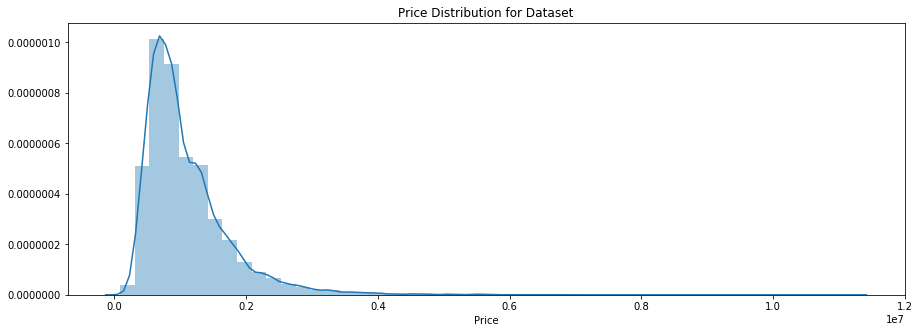

In [9]:
plt.figure(figsize=(15,5))
sns.distplot(df.Price)
plt.title('Price Distribution for Dataset')
plt.show()

In [10]:
# Observing the correlations of features against target variable 'Price'
corr = df.corr()
corr['Price']

Rooms            0.444840
Price            1.000000
Distance        -0.236455
Postcode         0.034974
Bedroom2         0.430296
Bathroom         0.429878
Car              0.200711
Landsize         0.030446
BuildingArea     0.074828
YearBuilt       -0.261293
Lattitude       -0.216179
Longtitude       0.198100
Propertycount   -0.051381
Name: Price, dtype: float64

As one would assume, the higher correlations with house prices are with the features: Rooms, Bedroom2, Bathroom, and Car. There also seem to be negative correlations with the year built - that's reasonable. Interestingly, we also see hints of correlation with Lattitude (sic) and Longitude that seem to hint toward a wealthier area.

## Feature Engineering

In [11]:
df.dtypes[df.dtypes == 'object']

Suburb         object
Address        object
Type           object
Method         object
SellerG        object
Date           object
CouncilArea    object
Regionname     object
dtype: object

* Suburb: 338 different values (for initial study will be dropping, may add later)
* Address: almost all are unique values; provides no insight
* Type: 3 unique values
* Method: type of sale (5 unique values)
* SellerG: Real Estate Agent (323 unique values: could be interesting to observe, but we will remove)
* Date: splitting into day, month, year columns
* CouncilArea: 33 unique values (may provide insight)
* Regionname: 8 unique values

In [12]:
features = df.drop('Price', 1)
features = features.drop(['Suburb','Address','SellerG'], 1)
features = pd.concat([features.drop('Type', axis=1), 
                      pd.get_dummies(features['Type'], prefix='Type')], axis=1)
features = pd.concat([features.drop('Method', axis=1), 
                      pd.get_dummies(features['Method'], prefix='Method')], axis=1)
features['year'] = pd.DatetimeIndex(df['Date']).year
features['month'] = pd.DatetimeIndex(df['Date']).month
features['date'] = pd.DatetimeIndex(df['Date']).day
features = features.drop('Date', 1)
features = pd.concat([features.drop('CouncilArea', axis=1), 
                      pd.get_dummies(features['CouncilArea'], prefix='CouncilArea')], axis=1)
features = pd.concat([features.drop('Regionname', axis=1), 
                      pd.get_dummies(features['Regionname'], prefix='Regionname')], axis=1)

features.shape

(20800, 64)

## Model 1: Baseline Model with All Features

In [13]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    df.Price,
                                                    test_size = 0.3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


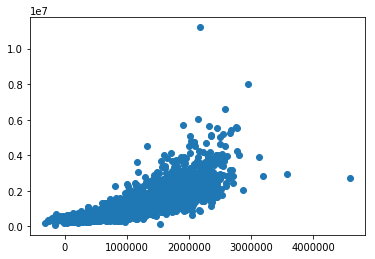


R-squared: 
 0.6205376124315909


In [14]:
lasso = Lasso()
lasso.fit(X_train, y_train)

pred = lasso.predict(X_test)

plt.scatter(pred, y_test)
plt.show()
print('\nR-squared: \n', lasso.score(X_test, y_test))

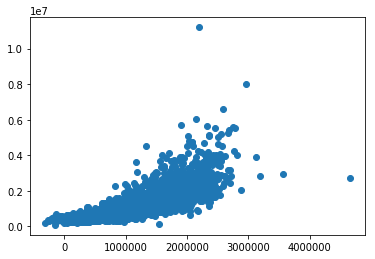


R-squared: 
 0.6203944937087845


In [15]:
ridge = Ridge()
ridge.fit(X_train, y_train)

pred = ridge.predict(X_test)

plt.scatter(pred, y_test)
plt.show()
print('\nR-squared: \n', ridge.score(X_test, y_test))

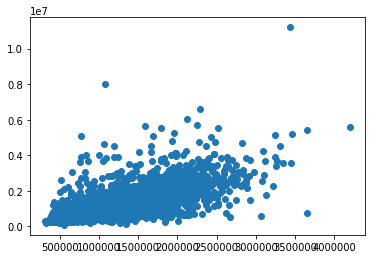


R-squared: 
 0.538619874249997


In [16]:
knr = KNeighborsRegressor(n_neighbors=10, weights='distance')
knr.fit(X_train, y_train)

pred = knr.predict(X_test)

plt.scatter(pred, y_test)
plt.show()
print('\nR-squared: \n', knr.score(X_test, y_test))

## Model 2: Reformed Model with All Features According to Logarithm of Target

In [17]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    np.log(df.Price),
                                                    test_size = 0.3)

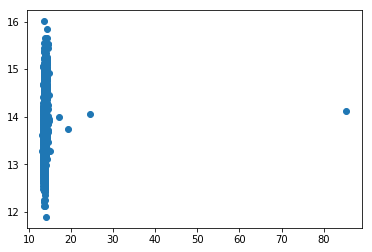


R-squared: 
 -2.9733151801310402


In [18]:
lasso = Lasso()
lasso.fit(X_train, y_train)

pred = lasso.predict(X_test)

plt.scatter(pred, y_test)
plt.show()
print('\nR-squared: \n', lasso.score(X_test, y_test))

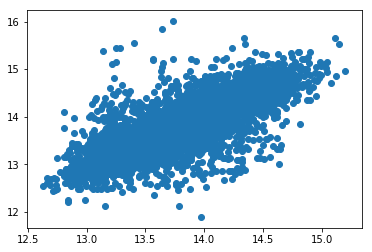


R-squared: 
 0.5893030113757122


In [19]:
knr = KNeighborsRegressor(n_neighbors=7, weights='distance')
knr.fit(X_train, y_train)

pred = knr.predict(X_test)

plt.scatter(pred, y_test)
plt.show()
print('\nR-squared: \n', knr.score(X_test, y_test))

## Model 3: Select Features According to Logarithm of Target

In [20]:
features_norm = (features - features.min()) / (features.max() - features.min())
features_norm.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,...,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1,0.066667,0.051975,0.068507,0.10,0.111111,0.055556,0.000466,0.003523,0.936338,0.493080,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.066667,0.051975,0.068507,0.10,0.111111,0.000000,0.000360,0.001775,0.855407,0.482609,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.133333,0.051975,0.068507,0.15,0.222222,0.000000,0.000309,0.003370,0.855407,0.480842,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.133333,0.051975,0.068507,0.15,0.222222,0.055556,0.000217,0.003523,0.936338,0.496486,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,0.200000,0.051975,0.068507,0.15,0.111111,0.111111,0.000277,0.003190,0.993925,0.483492,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [21]:
target_log = pd.Series(np.log(df.Price))
target_log = target_log.astype('int')

In [22]:
features_new = SelectKBest(chi2, k=20).fit_transform(features_norm, target_log)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(features_new, 
                                                    np.log(df.Price),
                                                    test_size = 0.3)

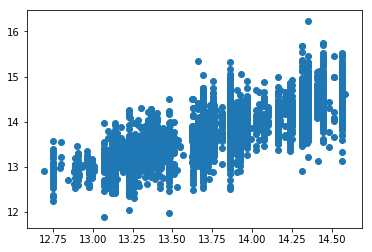


R-squared: 
 0.5659993462180302


In [24]:
knr = KNeighborsRegressor(n_neighbors=10, weights='distance')
knr.fit(X_train, y_train)

pred = knr.predict(X_test)

plt.scatter(pred, y_test)
plt.show()
print('\nR-squared: \n', knr.score(X_test, y_test))

## Model 4: Ensemble Modeling with Random Forest Regression

In [25]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    df.Price,
                                                    test_size = 0.3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


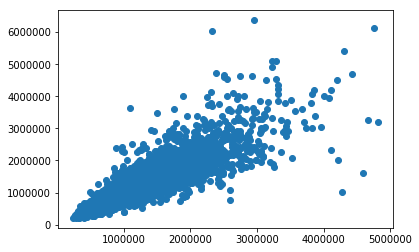


R-squared: 
 0.7866493651575502


In [26]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

pred = rfr.predict(X_test)

plt.scatter(pred, y_test)
plt.show()
print('\nR-squared: \n', rfr.score(X_test, y_test))

In [27]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    np.log(df.Price),
                                                    test_size = 0.3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


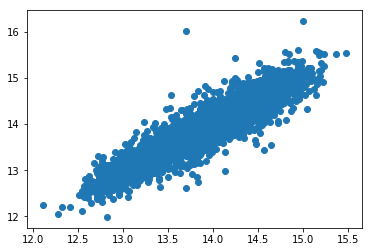


R-squared: 
 0.8582900921981435


In [28]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

pred = rfr.predict(X_test)

plt.scatter(pred, y_test)
plt.show()
print('\nR-squared: \n', rfr.score(X_test, y_test))

## Model 5: Ensemble Modeling with Select Features with Random Forest Regression

In [29]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

# Print the name and gini importance of each feature
feat_labels = features.columns
for feature in zip(feat_labels, rfr.feature_importances_):
    print(feature)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


('Rooms', 0.06625092520411227)
('Distance', 0.10667958716139907)
('Postcode', 0.01574620112201959)
('Bedroom2', 0.042329485042332554)
('Bathroom', 0.0209914118164895)
('Car', 0.007454475626237593)
('Landsize', 0.055820127242223926)
('BuildingArea', 0.02954968569360253)
('YearBuilt', 0.01343083879187787)
('Lattitude', 0.06334450301992724)
('Longtitude', 0.06857870131967252)
('Propertycount', 0.013265195432033538)
('Type_h', 0.004714069816860416)
('Type_t', 0.003663787210783588)
('Type_u', 0.20604159179575263)
('Method_PI', 0.0020256201479001107)
('Method_S', 0.0026486967186089188)
('Method_SA', 0.0001622431083938865)
('Method_SP', 0.0010921270025157953)
('Method_VB', 0.0017757461702624904)
('year', 0.003977037445360829)
('month', 0.008060277510158247)
('date', 0.010770058570523766)
('CouncilArea_Banyule City Council', 0.0009190681539262439)
('CouncilArea_Bayside City Council', 0.0003784329329440602)
('CouncilArea_Boroondara City Council', 0.0007615108837784506)
('CouncilArea_Brimbank Ci

In [30]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(rfr, threshold=0.025)

# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=0.025)

In [31]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

Rooms
Distance
Bedroom2
Landsize
BuildingArea
Lattitude
Longtitude
Type_u
Regionname_Eastern Metropolitan
Regionname_Southern Metropolitan


In [32]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [33]:
# Create a new random forest classifier for the most important features
rfr_important = RandomForestRegressor(n_estimators=10000, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
rfr_important.fit(X_important_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

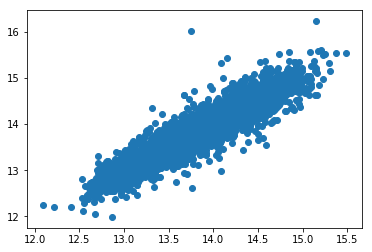


R-squared: 
 0.8583813664979164


In [36]:
pred = rfr_important.predict(X_important_test)

plt.scatter(pred, y_test)
plt.show()
print('\nR-squared: \n', rfr_important.score(X_important_test, y_test))

While this model could still use adjustments, a 85% r-squared is commendable and accurate enough for the purposes of this assignment. Lastly, the reduced feature model (of 10 features) performed slightly better than the all feature model; however, when the reduced features were tested against the linear models of ridge and lasso, they didn't even predict 10% of the variance.

In conclusion, while Random Forest ensemble is the most accurate of the models shown above, it would be useful to develop a model that gave more insight into how each of the features contributed to the predicted variable.